In [1]:
from NCHelper import NCHelper
from datetime import datetime, timedelta
import xarray as xr
import time
import os
import shutil

In [ ]:
date_str = "2023110701"
dataset_url = f"http://182.16.248.173:8080/dods/INA-NWP/{date_str}/{date_str}-d01-asim"
nch = NCHelper(
    dataset_url,
    dir_path=f"storage/{date_str}",
)

In [3]:
date = datetime.now().replace(hour=00)
ds = None
while True:
    date_str = date.strftime("%Y%m%d%H")
    dir_path = f"storage/{date_str}"
    if os.path.exists(dir_path):
        print("already exists")
        break
    
    try:
        ds_url = (
            f"http://182.16.248.173:8080/dods/INA-NWP/{date_str}/{date_str}-d01-asim"
        )
        nch = NCHelper(
            ds_url,
            dir_path=dir_path,
        )
        break
    except:
        print(date_str)
        date = date - timedelta(hours=12)
    time.sleep(1)

reading dataset...
reading dataset failed
2023110800
reading dataset...
reading dataset failed
2023110712


In [56]:
date_str = "2023110612"
ds_url = f"http://182.16.248.173:8080/dods/INA-NWP/{date_str}/{date_str}-d01-asim"
dir_path = f"storage/{date_str}"

try:
    print("reading dataset...")
    ds = xr.open_dataset(ds_url)
    if os.path.exists(dir_path):
        shutil.rmtree(dir_path)
    os.mkdir(dir_path)
    print("reading dataset done")
except:
    print("reading dataset failed")


reading dataset...


In [3]:
u = nch.ds["u"]
v = nch.ds["v"]
lat = nch.ds["lat"]
lon = nch.ds["lon"]
nch.nc2asc(u[0][0], lat, lon, "U")
nch.nc2asc(v[0][0], lat, lon, "V")

generating U ascii grid...
file: d:/0Me/Kuliah/Magang BMKG/tes-netcdf/storage/2023110700/U.asc
generating V ascii grid...
file: d:/0Me/Kuliah/Magang BMKG/tes-netcdf/storage/2023110700/V.asc


generating tc the images...


c:\Users\falbas\miniconda3\Lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


output: d:/0Me/Kuliah/Magang BMKG/tes-netcdf/storage/2023110700/tc.tiff
output: d:/0Me/Kuliah/Magang BMKG/tes-netcdf/storage/2023110700/tc.png
output: d:/0Me/Kuliah/Magang BMKG/tes-netcdf/storage/2023110700/tc_colorbar.png
output: d:/0Me/Kuliah/Magang BMKG/tes-netcdf/storage/2023110700/tc_rgb.tiff


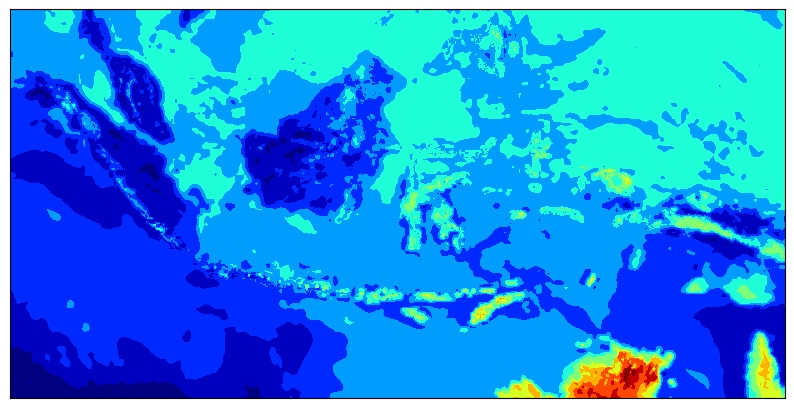

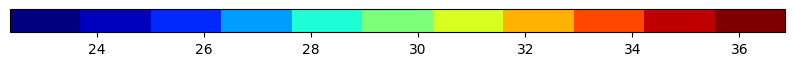

In [6]:
tc = nch.ds["tc"]
nch.nc2image(tc[0][0], "tc", x_dim="lon", y_dim="lat", flip=0, cmap="tc_color.txt")

In [ ]:
rainc = nch.ds["rainc"]
rainsh = nch.ds["rainsh"]
rainnc = nch.ds["rainnc"]
nch.nc2image(rainc[0][0], "rainc", x_dim="lon", y_dim="lat", flip=0, cmap="tc_color.txt")
nch.nc2image(rainsh[0][0], "rainsh", x_dim="lon", y_dim="lat", flip=0, cmap="tc_color.txt")
nch.nc2image(rainnc[0][0], "rainnc", x_dim="lon", y_dim="lat", flip=0, cmap="tc_color.txt")

In [5]:
prep = rainc+rainsh+rainnc

generating prep the images...


c:\Users\falbas\miniconda3\Lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


output: d:/0Me/Kuliah/Magang BMKG/tes-netcdf/storage/2023110700/prep.tiff
output: d:/0Me/Kuliah/Magang BMKG/tes-netcdf/storage/2023110700/prep.png
output: d:/0Me/Kuliah/Magang BMKG/tes-netcdf/storage/2023110700/prep_colorbar.png
output: d:/0Me/Kuliah/Magang BMKG/tes-netcdf/storage/2023110700/prep_rgb.tiff


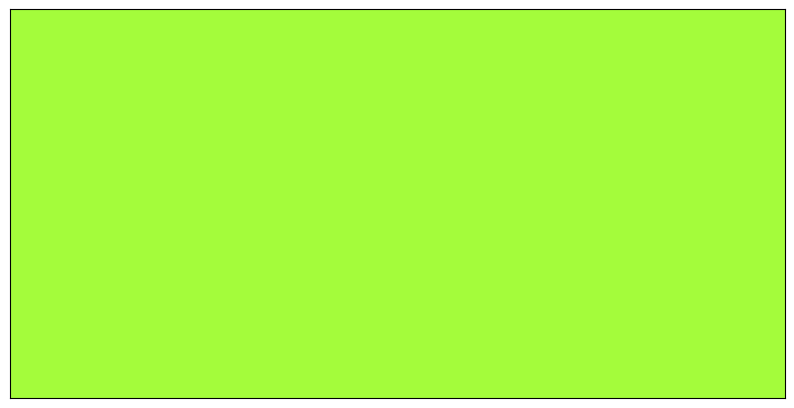

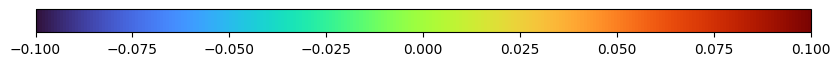

In [9]:
nch.nc2image(prep, "prep", x_dim="lon", y_dim="lat", flip=0, cmap="turbo")